In [1]:
import data_handler
import model as M
import dilated_model as DM
import trainer as T


import torch as th
from torch.autograd import Variable
import pickle
import random
random.seed(42)

In [2]:
from IPython import display
from scipy.io import loadmat
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.mlab import specgram
# import seaborn as sns
import time

%matplotlib inline
th.multiprocessing.set_sharing_strategy('file_system')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [8]:
dataset = data_handler.DataSet(
    'data/raw/training2017/REFERENCE.csv', data_handler.load_crop,
    path='data/raw/training2017/',
    remove_noise=True, tokens='NAO')
train_set, eval_set = dataset.disjunct_split(.8)
train_producer = th.utils.data.DataLoader(
        dataset=train_set, batch_size=1,
    shuffle=True,
        num_workers=0, collate_fn=data_handler.batchify)

In [9]:
in_channels = 1
nondilNet = M.BaseLineFCN(in_channels, [128, 256, 128])
dilNet = DM.DilatedFCN(in_channels, [128, 256, 128], [[16, 32, 64]]*3)
alt_dilNet = DM.DilatedFCN(in_channels, [128, 256, 128], [[16]*3, [32]*3, [64]*3])

In [10]:
nondilNet.__call__

<bound method Module.__call__ of BaseLineFCN (
  (conv1): MultiKernelBlock (
    (kernel_list): ModuleList (
      (0): Conv1d(1, 128, kernel_size=(9,), stride=(1,), padding=(4,), bias=False)
      (1): Conv1d(1, 128, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
      (2): Conv1d(1, 128, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    )
  )
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True)
  (conv2): MultiKernelBlock (
    (kernel_list): ModuleList (
      (0): Conv1d(128, 256, kernel_size=(9,), stride=(1,), padding=(4,), bias=False)
      (1): Conv1d(128, 256, kernel_size=(5,), stride=(1,), padding=(2,), bias=False)
      (2): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    )
  )
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True)
  (conv3): MultiKernelBlock (
    (kernel_list): ModuleList (
      (0): Conv1d(256, 128, kernel_size=(9,), stride=(1,), padding=(4,), bias=False)
      (1): Conv1d(256, 128, ke

In [21]:
def plot_logit(dilNet):
    dil_res = dilNet.forward_conv(_data, )
    plt.imshow(dil_res.data.numpy().squeeze(), aspect="auto", interpolation='None')
    plt.show()

    plt.subplot(3,1,1)
    plt.plot(dil_res.data.numpy().squeeze()[0])

    plt.subplot(3,1,2)
    plt.plot(dil_res.data.numpy().squeeze()[1])

    plt.subplot(3,1,3)
    plt.plot(dil_res.data.numpy().squeeze()[2])

# PROOF OF CONCEPT

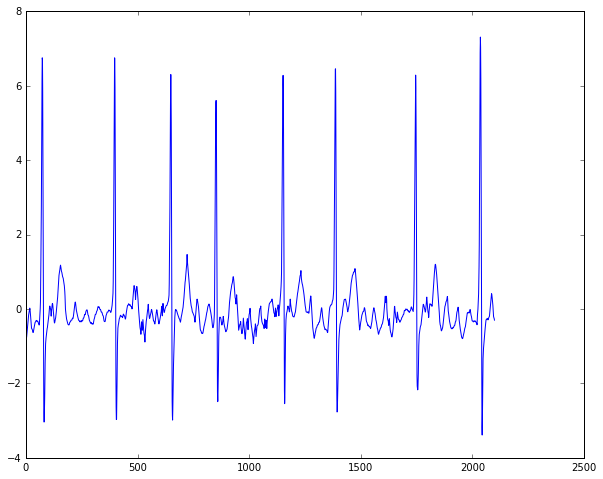

In [23]:
it = iter(train_producer)
data = it.next()
in_channels = data['x'].size()[1]
_data = data['x']
plt.plot(_data.data.numpy().squeeze())

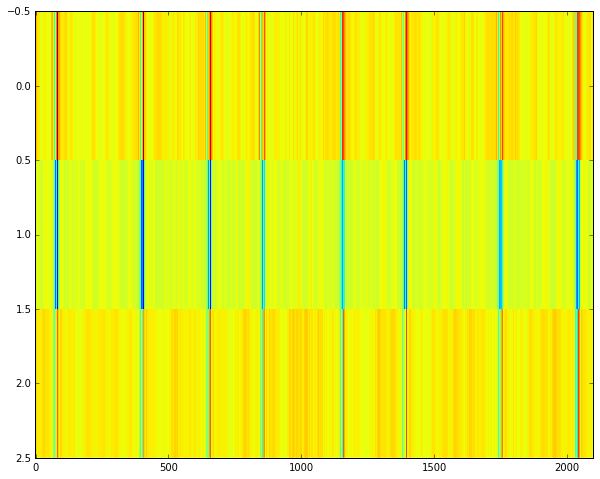

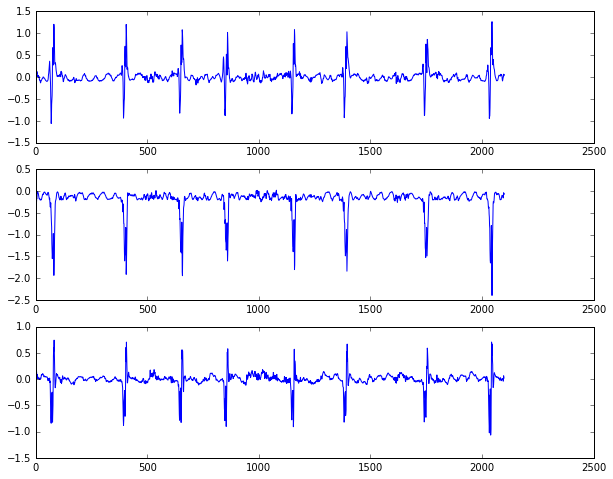

In [24]:
nondil_res = nondilNet.forward_conv(_data, )
plt.imshow(nondil_res.data.numpy().squeeze(), aspect="auto", interpolation='None')
plt.show()
plt.subplot(3,1,1)
plt.plot(nondil_res.data.numpy().squeeze()[0])

plt.subplot(3,1,2)
plt.plot(nondil_res.data.numpy().squeeze()[1])

plt.subplot(3,1,3)
plt.plot(nondil_res.data.numpy().squeeze()[2])

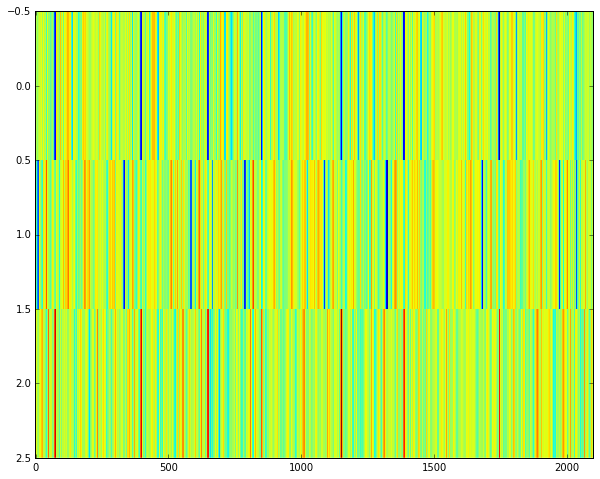

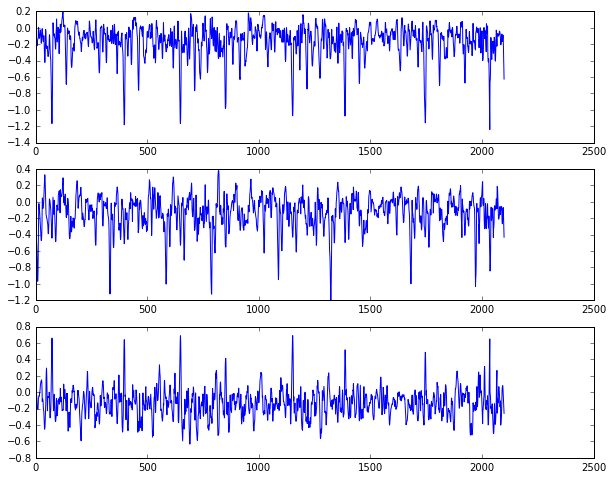

In [25]:
dil_res = dilNet.forward_conv(_data, )
plt.imshow(dil_res.data.numpy().squeeze(), aspect="auto", interpolation='None')
plt.show()

plt.subplot(3,1,1)
plt.plot(dil_res.data.numpy().squeeze()[0])

plt.subplot(3,1,2)
plt.plot(dil_res.data.numpy().squeeze()[1])

plt.subplot(3,1,3)
plt.plot(dil_res.data.numpy().squeeze()[2])


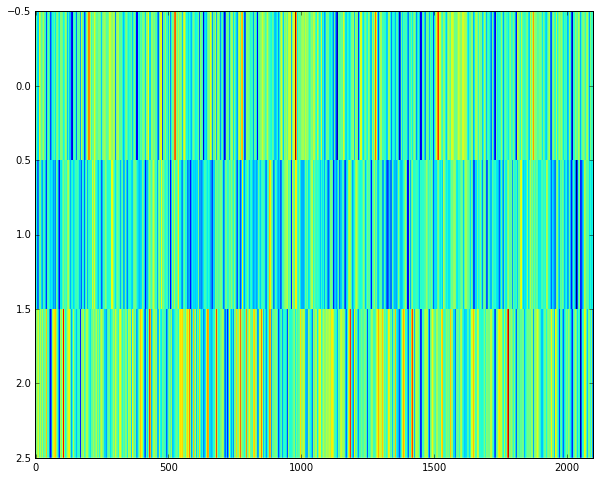

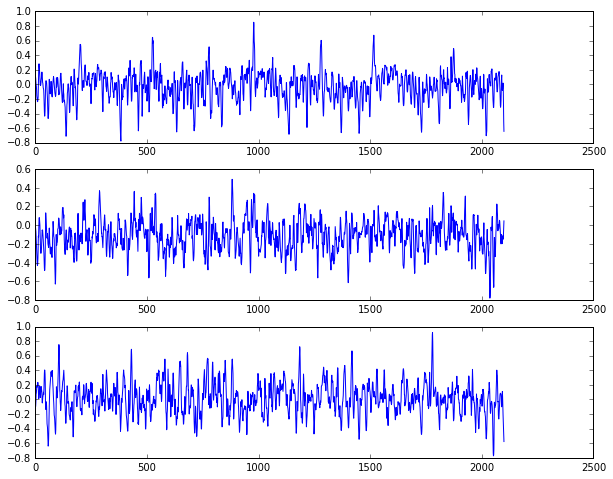

In [26]:
plot_logit(alt_dilNet)

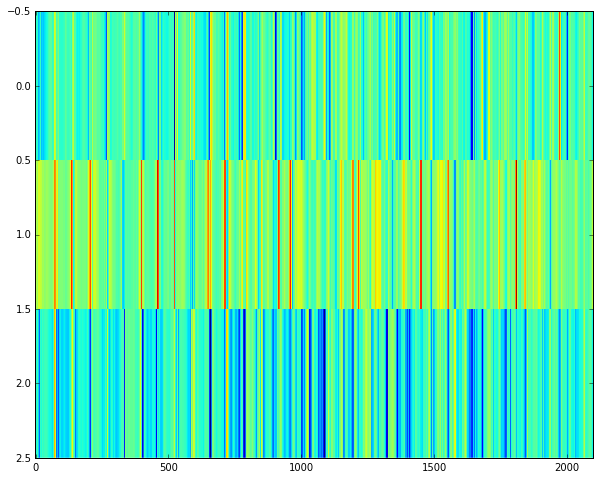

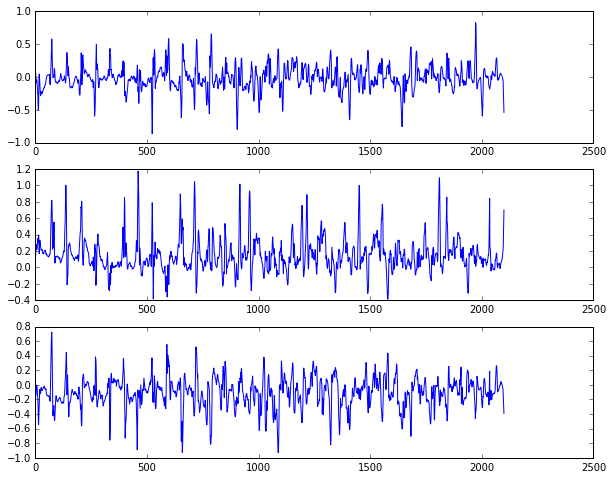

In [28]:
largeDilNet = DM.DilatedFCN(in_channels, [128, 256, 128], [[64]*3]*3)
plot_logit(largeDilNet)

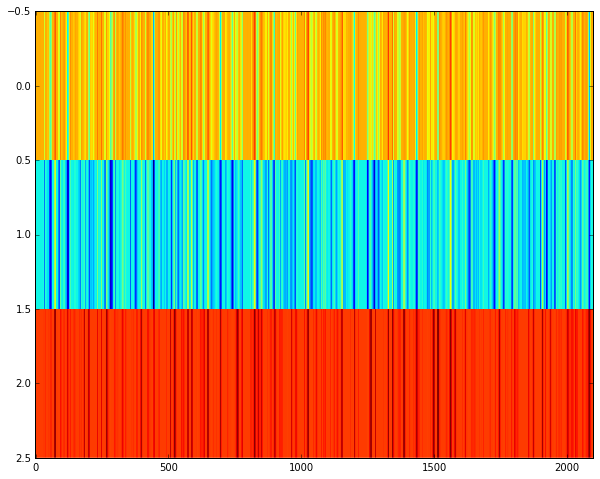

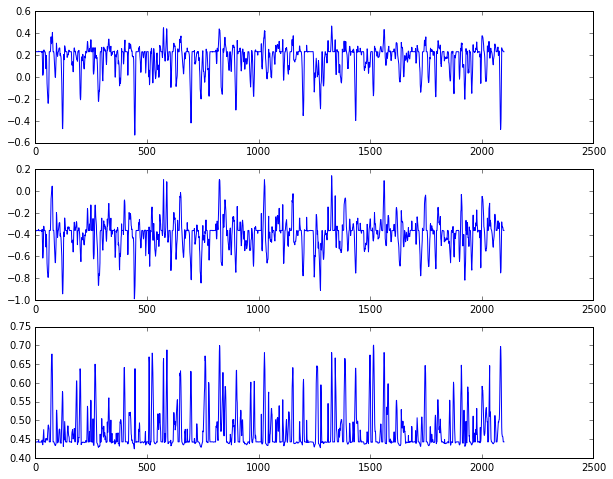

In [30]:
low_cap_alt_DilNet = DM.DilatedFCN(in_channels, [4, 8, 4], [[16]*3, [32]*3, [64]*3])
plot_logit(low_cap_alt_DilNet)

In [ ]:
train_producer = th.utils.data.DataLoader(
        dataset=train_set, batch_size=64, shuffle=True,
        num_workers=0, collate_fn=data_handler.batchify)
test_producer = th.utils.data.DataLoader(
        dataset=eval_set, batch_size=128, shuffle=True,
        num_workers=0, collate_fn=data_handler.batchify)
trainer = T.trainer('ckpt/low_cap_alt_dil')
trainer(low_cap_alt_DilNet, train_producer, test_producer, epochs=1000, gpu_id=0)

[1,  10] sample/sec 4424.81
[1,  20] sample/sec 4520.03
[1,  30] sample/sec 4831.89
[1,  40] sample/sec 4897.65
[1,  50] sample/sec 4938.11
[1,  60] sample/sec 4952.78
[1,  70] sample/sec 4892.03
[1,  80] sample/sec 4984.78
[1,  90] sample/sec 4960.46
[1, 100] sample/sec 4915.68
Train acc: 
 0.0000  0.0000  0.4926
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.35
 0.0000  0.0144  0.5387
[torch.FloatTensor of size 1x3]

epoch time:       0.13 min
     total:       0.13 min
 est. left:     126.80 min
----------------------------------------
[2,  10] sample/sec 4985.98
[2,  20] sample/sec 5010.37
[2,  30] sample/sec 4960.00
[2,  40] sample/sec 5006.54
[2,  50] sample/sec 5063.86
[2,  60] sample/sec 4741.34
[2,  70] sample/sec 4955.43
[2,  80] sample/sec 4959.55
[2,  90] sample/sec 4956.80
[2, 100] sample/sec 5009.62
Train acc: 
 0.0000  0.2219  0.4902
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.65
 0.0000  0.4195  0.5468
[torch.FloatTensor of size 1x

[15, 100] sample/sec 4919.55
Train acc: 
 0.6828  0.7332  0.4251
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.25
 0.6163  0.7694  0.4522
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:       1.75 min
 est. left:     115.21 min
----------------------------------------
[16,  10] sample/sec 4950.40
[16,  20] sample/sec 4886.06
[16,  30] sample/sec 4918.47
[16,  40] sample/sec 4968.73
[16,  50] sample/sec 4989.23
[16,  60] sample/sec 4937.83
[16,  70] sample/sec 4939.65
[16,  80] sample/sec 4984.78
[16,  90] sample/sec 4907.05
[16, 100] sample/sec 4938.56
Train acc: 
 0.6834  0.7146  0.4309
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.12
 0.7511  0.6873  0.4461
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:       1.87 min
 est. left:     115.07 min
----------------------------------------
[17,  10] sample/sec 4840.77
[17,  20] sample/sec 4949.12
[17,  30] sample/sec 4872.23
[17,  40] sample/sec 4806.54

[30,  10] sample/sec 4850.83
[30,  20] sample/sec 4904.36
[30,  30] sample/sec 4906.87
[30,  40] sample/sec 4936.65
[30,  50] sample/sec 4949.31
[30,  60] sample/sec 4990.34
[30,  70] sample/sec 4947.85
[30,  80] sample/sec 4924.61
[30,  90] sample/sec 4950.95
[30, 100] sample/sec 4943.29
Train acc: 
 0.6918  0.7453  0.4887
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.15
 0.7145  0.5918  0.4076
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:       3.50 min
 est. left:     113.12 min
----------------------------------------
[31,  10] sample/sec 4947.39
[31,  20] sample/sec 4826.93
[31,  30] sample/sec 4941.74
[31,  40] sample/sec 4941.83
[31,  50] sample/sec 4970.57
[31,  60] sample/sec 4911.18
[31,  70] sample/sec 4942.02
[31,  80] sample/sec 4906.25
[31,  90] sample/sec 4818.10
[31, 100] sample/sec 4975.54
Train acc: 
 0.6997  0.7546  0.4901
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.15
 0.5325  0.7689  0.5088
[torch.Fl

[44,  70] sample/sec 4971.86
[44,  80] sample/sec 5103.63
[44,  90] sample/sec 4889.00
[44, 100] sample/sec 4889.00
Train acc: 
 0.7027  0.7491  0.5276
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.40
 0.7805  0.8133  0.4751
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:       5.13 min
 est. left:     111.38 min
----------------------------------------
[45,  10] sample/sec 4807.40
[45,  20] sample/sec 5061.48
[45,  30] sample/sec 4964.68
[45,  40] sample/sec 4881.18
[45,  50] sample/sec 4978.22
[45,  60] sample/sec 4912.71
[45,  70] sample/sec 4804.99
[45,  80] sample/sec 4945.20
[45,  90] sample/sec 4985.34
[45, 100] sample/sec 4945.66
Train acc: 
 0.6982  0.7575  0.5060
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.41
 0.7695  0.8219  0.5758
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:       5.24 min
 est. left:     111.25 min
----------------------------------------
[46,  10] sample/sec 4760.25

  13, sample/sec: 216.42
 0.7677  0.7973  0.5005
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:       6.75 min
 est. left:     109.61 min
----------------------------------------
[59,  10] sample/sec 4951.13
[59,  20] sample/sec 4837.72
[59,  30] sample/sec 4724.23
[59,  40] sample/sec 4701.39
[59,  50] sample/sec 4694.82
[59,  60] sample/sec 4702.30
[59,  70] sample/sec 4981.82
[59,  80] sample/sec 4990.90
[59,  90] sample/sec 4929.94
[59, 100] sample/sec 4800.26
Train acc: 
 0.7190  0.7561  0.5334
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.49
 0.7595  0.8145  0.4730
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:       6.86 min
 est. left:     109.48 min
----------------------------------------
[60,  10] sample/sec 4942.20
[60,  20] sample/sec 4703.37
[60,  30] sample/sec 4846.46
[60,  40] sample/sec 4909.39
[60,  50] sample/sec 4894.08
[60,  60] sample/sec 4946.39
[60,  70] sample/sec 4709.64
[60,  80] sample/sec

[73,  10] sample/sec 5050.91
[73,  20] sample/sec 4990.16
[73,  30] sample/sec 4873.73
[73,  40] sample/sec 4981.17
[73,  50] sample/sec 5027.07
[73,  60] sample/sec 4835.46
[73,  70] sample/sec 4923.34
[73,  80] sample/sec 4973.79
[73,  90] sample/sec 4892.56
[73, 100] sample/sec 4963.58
Train acc: 
 0.7082  0.7868  0.5507
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.49
 0.6777  0.8052  0.6199
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:       8.49 min
 est. left:     107.81 min
----------------------------------------
[74,  10] sample/sec 5029.33
[74,  20] sample/sec 4976.56
[74,  30] sample/sec 4904.72
[74,  40] sample/sec 4904.18
[74,  50] sample/sec 4989.88
[74,  60] sample/sec 4785.03
[74,  70] sample/sec 4924.07
[74,  80] sample/sec 4993.03
[74,  90] sample/sec 4972.04
[74, 100] sample/sec 4937.65
Train acc: 
 0.7126  0.7691  0.5405
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.46
 0.5794  0.7179  0.4111
[torch.Fl

[87,  70] sample/sec 4960.19
[87,  80] sample/sec 4936.56
[87,  90] sample/sec 4783.50
[87, 100] sample/sec 4846.28
Train acc: 
 0.7085  0.7762  0.5443
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.54
 0.7137  0.7862  0.4700
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      10.12 min
 est. left:     106.17 min
----------------------------------------
[88,  10] sample/sec 4939.38
[88,  20] sample/sec 4901.77
[88,  30] sample/sec 4852.32
[88,  40] sample/sec 4894.53
[88,  50] sample/sec 4962.57
[88,  60] sample/sec 4930.76
[88,  70] sample/sec 4976.56
[88,  80] sample/sec 4909.66
[88,  90] sample/sec 4888.20
[88, 100] sample/sec 4938.83
Train acc: 
 0.7147  0.7788  0.5515
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.48
 0.7788  0.8066  0.4589
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      10.23 min
 est. left:     106.05 min
----------------------------------------
[89,  10] sample/sec 4935.75

  13, sample/sec: 216.29
 0.7861  0.8206  0.5529
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      11.74 min
 est. left:     104.51 min
----------------------------------------
[102,  10] sample/sec 4852.59
[102,  20] sample/sec 4857.86
[102,  30] sample/sec 4943.56
[102,  40] sample/sec 4920.28
[102,  50] sample/sec 4989.32
[102,  60] sample/sec 4992.20
[102,  70] sample/sec 4985.98
[102,  80] sample/sec 4912.71
[102,  90] sample/sec 4866.58
[102, 100] sample/sec 4991.73
Train acc: 
 0.7163  0.7911  0.5599
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.49
 0.7826  0.7809  0.6019
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      11.86 min
 est. left:     104.39 min
----------------------------------------
[103,  10] sample/sec 4950.13
[103,  20] sample/sec 4962.94
[103,  30] sample/sec 4942.47
[103,  40] sample/sec 4935.56
[103,  50] sample/sec 4871.88
[103,  60] sample/sec 4919.37
[103,  70] sample/sec 4822.94
[10

[116,  10] sample/sec 4707.82
[116,  20] sample/sec 4724.15
[116,  30] sample/sec 4720.74
[116,  40] sample/sec 4910.82
[116,  50] sample/sec 4795.37
[116,  60] sample/sec 4950.04
[116,  70] sample/sec 4836.06
[116,  80] sample/sec 4955.88
[116,  90] sample/sec 4941.83
[116, 100] sample/sec 4948.58
Train acc: 
 0.7043  0.7714  0.5422
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.90
 0.7391  0.7213  0.5158
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      13.48 min
 est. left:     102.75 min
----------------------------------------
[117,  10] sample/sec 4913.88
[117,  20] sample/sec 4873.64
[117,  30] sample/sec 4991.45
[117,  40] sample/sec 4944.29
[117,  50] sample/sec 4972.04
[117,  60] sample/sec 4999.64
[117,  70] sample/sec 5002.15
[117,  80] sample/sec 4848.12
[117,  90] sample/sec 4926.60
[117, 100] sample/sec 4914.42
Train acc: 
 0.7214  0.7828  0.5503
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.68
 0.6692  0.81

[130,  30] sample/sec 4963.67
[130,  40] sample/sec 4953.87
[130,  50] sample/sec 4725.23
[130,  60] sample/sec 4718.67
[130,  70] sample/sec 4725.64
[130,  80] sample/sec 4727.72
[130,  90] sample/sec 4721.82
[130, 100] sample/sec 4717.84
Train acc: 
 0.7280  0.7857  0.5641
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.58
 0.7499  0.8072  0.6175
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      15.10 min
 est. left:     101.06 min
----------------------------------------
[131,  10] sample/sec 4965.42
[131,  20] sample/sec 4961.01
[131,  30] sample/sec 4944.47
[131,  40] sample/sec 4892.65
[131,  50] sample/sec 4948.85
[131,  60] sample/sec 4908.94
[131,  70] sample/sec 4919.55
[131,  80] sample/sec 4950.31
[131,  90] sample/sec 4909.21
[131, 100] sample/sec 4981.36
Train acc: 
 0.7157  0.7844  0.5747
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.67
 0.7333  0.7220  0.6115
[torch.FloatTensor of size 1x3]

epoch time:     

[144,  50] sample/sec 5003.36
[144,  60] sample/sec 4957.07
[144,  70] sample/sec 4977.57
[144,  80] sample/sec 4972.87
[144,  90] sample/sec 4830.58
[144, 100] sample/sec 4921.27
Train acc: 
 0.7212  0.7852  0.5612
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.76
 0.7219  0.8186  0.5129
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      16.72 min
 est. left:      99.40 min
----------------------------------------
[145,  10] sample/sec 4953.05
[145,  20] sample/sec 4948.39
[145,  30] sample/sec 4869.93
[145,  40] sample/sec 4928.41
[145,  50] sample/sec 4994.61
[145,  60] sample/sec 5023.40
[145,  70] sample/sec 4721.16
[145,  80] sample/sec 4712.70
[145,  90] sample/sec 4717.09
[145, 100] sample/sec 4725.39
Train acc: 
 0.7284  0.7973  0.5732
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.59
 0.7615  0.7623  0.6395
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      16.84 min
 est. left:      99.28

[158,  70] sample/sec 4956.43
[158,  80] sample/sec 5011.58
[158,  90] sample/sec 4961.29
[158, 100] sample/sec 4948.85
Train acc: 
 0.7203  0.7846  0.5547
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.70
 0.7696  0.7347  0.5973
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      18.34 min
 est. left:      97.74 min
----------------------------------------
[159,  10] sample/sec 4718.33
[159,  20] sample/sec 4715.76
[159,  30] sample/sec 4707.74
[159,  40] sample/sec 4701.31
[159,  50] sample/sec 4722.57
[159,  60] sample/sec 4711.46
[159,  70] sample/sec 4717.84
[159,  80] sample/sec 4717.67
[159,  90] sample/sec 4714.27
[159, 100] sample/sec 4716.18
Train acc: 
 0.7285  0.7869  0.5645
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.56
 0.3436  0.7336  0.5018
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      18.46 min
 est. left:      97.62 min
----------------------------------------
[160,  10] sam

[172,  90] sample/sec 4953.60
[172, 100] sample/sec 4881.71
Train acc: 
 0.7096  0.7741  0.5689
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.68
 0.7841  0.8314  0.5620
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      19.98 min
 est. left:      96.17 min
----------------------------------------
[173,  10] sample/sec 4993.31
[173,  20] sample/sec 4913.79
[173,  30] sample/sec 4962.11
[173,  40] sample/sec 4983.67
[173,  50] sample/sec 4964.87
[173,  60] sample/sec 4966.89
[173,  70] sample/sec 4922.35
[173,  80] sample/sec 4987.56
[173,  90] sample/sec 4966.61
[173, 100] sample/sec 4946.93
Train acc: 
 0.7153  0.7816  0.5725
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.66
 0.7311  0.7786  0.4845
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      20.09 min
 est. left:      96.05 min
----------------------------------------
[174,  10] sample/sec 4939.29
[174,  20] sample/sec 4930.22
[174,  30] sam

  13, sample/sec: 216.91
 0.5680  0.7195  0.4238
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      21.60 min
 est. left:      94.55 min
----------------------------------------
[187,  10] sample/sec 4945.11
[187,  20] sample/sec 4915.05
[187,  30] sample/sec 4920.09
[187,  40] sample/sec 4949.03
[187,  50] sample/sec 4952.59
[187,  60] sample/sec 4931.57
[187,  70] sample/sec 4990.06
[187,  80] sample/sec 4925.69
[187,  90] sample/sec 4948.30
[187, 100] sample/sec 4933.02
Train acc: 
 0.7268  0.7921  0.5566
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.76
 0.3840  0.8092  0.5915
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      21.72 min
 est. left:      94.43 min
----------------------------------------
[188,  10] sample/sec 4867.19
[188,  20] sample/sec 4948.30
[188,  30] sample/sec 4796.57
[188,  40] sample/sec 4916.85
[188,  50] sample/sec 4832.93
[188,  60] sample/sec 4924.25
[188,  70] sample/sec 4924.43
[18

[201,  10] sample/sec 4921.27
[201,  20] sample/sec 4875.95
[201,  30] sample/sec 4959.36
[201,  40] sample/sec 4973.42
[201,  50] sample/sec 4951.77
[201,  60] sample/sec 4908.85
[201,  70] sample/sec 4951.86
[201,  80] sample/sec 4999.08
[201,  90] sample/sec 4979.23
[201, 100] sample/sec 4942.47
Train acc: 
 0.7095  0.7817  0.5582
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.77
 0.7591  0.7767  0.5789
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      23.34 min
 est. left:      92.78 min
----------------------------------------
[202,  10] sample/sec 4981.08
[202,  20] sample/sec 4915.77
[202,  30] sample/sec 4947.21
[202,  40] sample/sec 4945.84
[202,  50] sample/sec 4884.82
[202,  60] sample/sec 4945.93
[202,  70] sample/sec 4949.76
[202,  80] sample/sec 4929.67
[202,  90] sample/sec 4876.30
[202, 100] sample/sec 4946.02
Train acc: 
 0.7037  0.7898  0.5507
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.74
 0.7531  0.79

[215,  30] sample/sec 4735.56
[215,  40] sample/sec 4717.75
[215,  50] sample/sec 4696.62
[215,  60] sample/sec 4722.07
[215,  70] sample/sec 4728.81
[215,  80] sample/sec 4901.77
[215,  90] sample/sec 4952.68
[215, 100] sample/sec 4926.69
Train acc: 
 0.7223  0.7929  0.5774
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.85
 0.7473  0.8195  0.5874
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      24.96 min
 est. left:      91.12 min
----------------------------------------
[216,  10] sample/sec 4956.16
[216,  20] sample/sec 4848.82
[216,  30] sample/sec 4803.35
[216,  40] sample/sec 4998.43
[216,  50] sample/sec 4976.10
[216,  60] sample/sec 4889.18
[216,  70] sample/sec 4894.26
[216,  80] sample/sec 4905.08
[216,  90] sample/sec 4940.29
[216, 100] sample/sec 4950.22
Train acc: 
 0.7095  0.8017  0.5643
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.68
 0.7607  0.8344  0.5663
[torch.FloatTensor of size 1x3]

epoch time:     

[229,  50] sample/sec 4938.65
[229,  60] sample/sec 4917.39
[229,  70] sample/sec 4847.24
[229,  80] sample/sec 4959.55
[229,  90] sample/sec 5014.39
[229, 100] sample/sec 4885.80
Train acc: 
 0.7175  0.7906  0.5887
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.80
 0.7828  0.8095  0.6103
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      26.58 min
 est. left:      89.49 min
----------------------------------------
[230,  10] sample/sec 4808.52
[230,  20] sample/sec 4965.51
[230,  30] sample/sec 4916.31
[230,  40] sample/sec 4920.28
[230,  50] sample/sec 4966.15
[230,  60] sample/sec 4956.80
[230,  70] sample/sec 4955.79
[230,  80] sample/sec 4930.22
[230,  90] sample/sec 4822.94
[230, 100] sample/sec 5001.50
Train acc: 
 0.7191  0.8016  0.5671
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.69
 0.7275  0.8202  0.6116
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      26.70 min
 est. left:      89.37

[243,  70] sample/sec 5011.49
[243,  80] sample/sec 4956.89
[243,  90] sample/sec 4894.08
[243, 100] sample/sec 4947.21
Train acc: 
 0.7226  0.8052  0.5813
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.67
 0.6990  0.7083  0.6275
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      28.20 min
 est. left:      87.84 min
----------------------------------------
[244,  10] sample/sec 4872.85
[244,  20] sample/sec 4886.33
[244,  30] sample/sec 4879.23
[244,  40] sample/sec 4924.34
[244,  50] sample/sec 4940.01
[244,  60] sample/sec 4916.40
[244,  70] sample/sec 4899.98
[244,  80] sample/sec 5004.67
[244,  90] sample/sec 4947.48
[244, 100] sample/sec 4954.51
Train acc: 
 0.7140  0.8080  0.5756
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.72
 0.7765  0.7642  0.6200
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      28.31 min
 est. left:      87.72 min
----------------------------------------
[245,  10] sam

[257,  90] sample/sec 4946.39
[257, 100] sample/sec 4971.03
Train acc: 
 0.7172  0.7948  0.5745
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.59
 0.7943  0.8428  0.6029
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      29.82 min
 est. left:      86.20 min
----------------------------------------
[258,  10] sample/sec 4960.83
[258,  20] sample/sec 4944.20
[258,  30] sample/sec 4857.94
[258,  40] sample/sec 4954.60
[258,  50] sample/sec 4946.39
[258,  60] sample/sec 4967.53
[258,  70] sample/sec 4980.99
[258,  80] sample/sec 4955.88
[258,  90] sample/sec 4740.58
[258, 100] sample/sec 4733.48
Train acc: 
 0.7217  0.7989  0.5847
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.55
 0.7720  0.8310  0.4822
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      29.93 min
 est. left:      86.08 min
----------------------------------------
[259,  10] sample/sec 4793.32
[259,  20] sample/sec 4913.88
[259,  30] sam

  13, sample/sec: 216.70
 0.7029  0.8315  0.6050
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      31.44 min
 est. left:      84.57 min
----------------------------------------
[272,  10] sample/sec 4961.01
[272,  20] sample/sec 4947.21
[272,  30] sample/sec 4803.87
[272,  40] sample/sec 5017.58
[272,  50] sample/sec 4993.03
[272,  60] sample/sec 4949.49
[272,  70] sample/sec 4928.68
[272,  80] sample/sec 4959.18
[272,  90] sample/sec 5005.70
[272, 100] sample/sec 4920.82
Train acc: 
 0.7275  0.8010  0.5879
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.69
 0.7919  0.8293  0.4335
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      31.55 min
 est. left:      84.45 min
----------------------------------------
[273,  10] sample/sec 4922.17
[273,  20] sample/sec 4941.47
[273,  30] sample/sec 4908.31
[273,  40] sample/sec 4977.48
[273,  50] sample/sec 4956.52
[273,  60] sample/sec 4946.30
[273,  70] sample/sec 4956.52
[27

[286,  10] sample/sec 4988.12
[286,  20] sample/sec 4942.83
[286,  30] sample/sec 4952.68
[286,  40] sample/sec 4851.10
[286,  50] sample/sec 4921.54
[286,  60] sample/sec 5003.46
[286,  70] sample/sec 4948.39
[286,  80] sample/sec 4946.20
[286,  90] sample/sec 5000.47
[286, 100] sample/sec 4939.47
Train acc: 
 0.7183  0.7977  0.5832
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.49
 0.7678  0.5945  0.5714
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      33.17 min
 est. left:      82.81 min
----------------------------------------
[287,  10] sample/sec 4917.03
[287,  20] sample/sec 4926.69
[287,  30] sample/sec 4864.81
[287,  40] sample/sec 4793.23
[287,  50] sample/sec 5015.80
[287,  60] sample/sec 4878.07
[287,  70] sample/sec 4947.02
[287,  80] sample/sec 5000.29
[287,  90] sample/sec 4981.45
[287, 100] sample/sec 5005.51
Train acc: 
 0.7226  0.8000  0.5773
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.42
 0.7877  0.83

[300,  30] sample/sec 4827.45
[300,  40] sample/sec 4955.79
[300,  50] sample/sec 4935.47
[300,  60] sample/sec 4827.80
[300,  70] sample/sec 4911.90
[300,  80] sample/sec 4915.95
[300,  90] sample/sec 4955.43
[300, 100] sample/sec 5005.79
Train acc: 
 0.7150  0.7998  0.5818
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.56
 0.7688  0.7402  0.6101
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      34.79 min
 est. left:      81.18 min
----------------------------------------
[301,  10] sample/sec 4977.39
[301,  20] sample/sec 4954.97
[301,  30] sample/sec 4953.69
[301,  40] sample/sec 4952.59
[301,  50] sample/sec 4920.73
[301,  60] sample/sec 4922.98
[301,  70] sample/sec 4997.22
[301,  80] sample/sec 4985.61
[301,  90] sample/sec 4875.41
[301, 100] sample/sec 5007.38
Train acc: 
 0.7296  0.7985  0.5637
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.46
 0.7726  0.8000  0.4216
[torch.FloatTensor of size 1x3]

epoch time:     

[314,  50] sample/sec 4788.79
[314,  60] sample/sec 4920.91
[314,  70] sample/sec 4947.75
[314,  80] sample/sec 4946.66
[314,  90] sample/sec 4914.87
[314, 100] sample/sec 4974.62
Train acc: 
 0.7216  0.7929  0.5691
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.60
 0.7584  0.7519  0.3749
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      36.41 min
 est. left:      79.55 min
----------------------------------------
[315,  10] sample/sec 4977.29
[315,  20] sample/sec 4955.24
[315,  30] sample/sec 4868.87
[315,  40] sample/sec 4897.74
[315,  50] sample/sec 4966.15
[315,  60] sample/sec 4923.34
[315,  70] sample/sec 4954.69
[315,  80] sample/sec 4853.64
[315,  90] sample/sec 4991.64
[315, 100] sample/sec 4964.13
Train acc: 
 0.7188  0.8108  0.5936
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.42
 0.7880  0.8280  0.5022
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      36.53 min
 est. left:      79.43

[328,  70] sample/sec 4952.41
[328,  80] sample/sec 4919.73
[328,  90] sample/sec 5073.63
[328, 100] sample/sec 5005.42
Train acc: 
 0.7273  0.7989  0.5871
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.46
 0.2534  0.6799  0.4444
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      38.04 min
 est. left:      77.93 min
----------------------------------------
[329,  10] sample/sec 4990.71
[329,  20] sample/sec 4861.90
[329,  30] sample/sec 4715.35
[329,  40] sample/sec 4729.56
[329,  50] sample/sec 4728.39
[329,  60] sample/sec 4718.67
[329,  70] sample/sec 4720.41
[329,  80] sample/sec 4724.65
[329,  90] sample/sec 4915.50
[329, 100] sample/sec 4798.72
Train acc: 
 0.7226  0.8105  0.5739
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.26
 0.7705  0.7982  0.4323
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      38.15 min
 est. left:      77.81 min
----------------------------------------
[330,  10] sam

[342,  90] sample/sec 4950.95
[342, 100] sample/sec 4967.90
Train acc: 
 0.7185  0.8044  0.5845
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.47
 0.7875  0.8323  0.5605
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      39.66 min
 est. left:      76.30 min
----------------------------------------
[343,  10] sample/sec 4865.61
[343,  20] sample/sec 4900.16
[343,  30] sample/sec 4944.38
[343,  40] sample/sec 4913.79
[343,  50] sample/sec 4969.19
[343,  60] sample/sec 4821.30
[343,  70] sample/sec 4939.20
[343,  80] sample/sec 5008.22
[343,  90] sample/sec 4943.11
[343, 100] sample/sec 4945.02
Train acc: 
 0.7260  0.8093  0.5944
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.32
 0.7857  0.8426  0.5733
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      39.77 min
 est. left:      76.18 min
----------------------------------------
[344,  10] sample/sec 4935.11
[344,  20] sample/sec 4971.21
[344,  30] sam

  13, sample/sec: 216.49
 0.5918  0.7806  0.5652
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      41.28 min
 est. left:      74.67 min
----------------------------------------
[357,  10] sample/sec 4951.68
[357,  20] sample/sec 5006.16
[357,  30] sample/sec 4950.77
[357,  40] sample/sec 4981.36
[357,  50] sample/sec 4821.21
[357,  60] sample/sec 4817.06
[357,  70] sample/sec 4951.13
[357,  80] sample/sec 4950.40
[357,  90] sample/sec 4954.97
[357, 100] sample/sec 4952.32
Train acc: 
 0.7250  0.7983  0.5884
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.67
 0.7830  0.8320  0.5747
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      41.39 min
 est. left:      74.55 min
----------------------------------------
[358,  10] sample/sec 4980.80
[358,  20] sample/sec 4924.16
[358,  30] sample/sec 4956.25
[358,  40] sample/sec 4930.22
[358,  50] sample/sec 4946.66
[358,  60] sample/sec 4913.25
[358,  70] sample/sec 4952.23
[35

[371,  10] sample/sec 4944.29
[371,  20] sample/sec 4996.75
[371,  30] sample/sec 4889.27
[371,  40] sample/sec 5105.57
[371,  50] sample/sec 4836.50
[371,  60] sample/sec 4948.76
[371,  70] sample/sec 4963.77
[371,  80] sample/sec 4912.98
[371,  90] sample/sec 4916.31
[371, 100] sample/sec 4955.24
Train acc: 
 0.7369  0.8105  0.5971
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.52
 0.7987  0.8555  0.5791
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      43.02 min
 est. left:      72.93 min
----------------------------------------
[372,  10] sample/sec 4953.14
[372,  20] sample/sec 4974.07
[372,  30] sample/sec 4967.99
[372,  40] sample/sec 4807.23
[372,  50] sample/sec 4960.83
[372,  60] sample/sec 4868.43
[372,  70] sample/sec 4974.25
[372,  80] sample/sec 4946.39
[372,  90] sample/sec 4914.69
[372, 100] sample/sec 5073.05
Train acc: 
 0.7329  0.8142  0.5876
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.68
 0.7847  0.80

[385,  30] sample/sec 4958.72
[385,  40] sample/sec 4948.58
[385,  50] sample/sec 4957.17
[385,  60] sample/sec 4785.80
[385,  70] sample/sec 4921.90
[385,  80] sample/sec 4916.58
[385,  90] sample/sec 4931.48
[385, 100] sample/sec 4878.25
Train acc: 
 0.7259  0.8098  0.5973
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.35
 0.7967  0.8464  0.6162
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      44.64 min
 est. left:      71.31 min
----------------------------------------
[386,  10] sample/sec 4979.60
[386,  20] sample/sec 4979.60
[386,  30] sample/sec 4945.38
[386,  40] sample/sec 4929.22
[386,  50] sample/sec 4957.07
[386,  60] sample/sec 4920.91
[386,  70] sample/sec 4998.43
[386,  80] sample/sec 4941.01
[386,  90] sample/sec 4713.86
[386, 100] sample/sec 4708.90
Train acc: 
 0.7260  0.8188  0.5970
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.56
 0.7338  0.5374  0.5150
[torch.FloatTensor of size 1x3]

epoch time:     

[399,  50] sample/sec 4866.22
[399,  60] sample/sec 4916.76
[399,  70] sample/sec 4926.51
[399,  80] sample/sec 4927.59
[399,  90] sample/sec 4923.52
[399, 100] sample/sec 4837.02
Train acc: 
 0.7285  0.8054  0.5824
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.66
 0.7638  0.7911  0.5876
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      46.26 min
 est. left:      69.68 min
----------------------------------------
[400,  10] sample/sec 4952.68
[400,  20] sample/sec 4916.22
[400,  30] sample/sec 4953.69
[400,  40] sample/sec 4826.50
[400,  50] sample/sec 4976.56
[400,  60] sample/sec 4949.40
[400,  70] sample/sec 4957.07
[400,  80] sample/sec 4950.22
[400,  90] sample/sec 4800.78
[400, 100] sample/sec 4944.56
Train acc: 
 0.7306  0.8044  0.6019
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.56
 0.7419  0.8387  0.5836
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      46.38 min
 est. left:      69.57

[413,  70] sample/sec 4922.44
[413,  80] sample/sec 5110.82
[413,  90] sample/sec 5077.47
[413, 100] sample/sec 4960.92
Train acc: 
 0.7334  0.8081  0.5992
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.55
 0.7762  0.7813  0.6123
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      47.88 min
 est. left:      68.06 min
----------------------------------------
[414,  10] sample/sec 4920.55
[414,  20] sample/sec 4953.60
[414,  30] sample/sec 4847.42
[414,  40] sample/sec 4949.49
[414,  50] sample/sec 4946.39
[414,  60] sample/sec 4782.90
[414,  70] sample/sec 4988.02
[414,  80] sample/sec 4910.02
[414,  90] sample/sec 4961.65
[414, 100] sample/sec 5119.88
Train acc: 
 0.7320  0.8047  0.5827
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.53
 0.7741  0.8268  0.6104
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      48.00 min
 est. left:      67.94 min
----------------------------------------
[415,  10] sam

[427,  90] sample/sec 4970.47
[427, 100] sample/sec 5075.64
Train acc: 
 0.7203  0.7996  0.5925
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.59
 0.7769  0.8152  0.5791
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      49.51 min
 est. left:      66.44 min
----------------------------------------
[428,  10] sample/sec 4918.20
[428,  20] sample/sec 5055.76
[428,  30] sample/sec 4776.09
[428,  40] sample/sec 4941.38
[428,  50] sample/sec 4944.66
[428,  60] sample/sec 4815.33
[428,  70] sample/sec 4946.30
[428,  80] sample/sec 4999.45
[428,  90] sample/sec 4840.51
[428, 100] sample/sec 4830.06
Train acc: 
 0.7260  0.7998  0.5932
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.41
 0.7189  0.8425  0.6163
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      49.62 min
 est. left:      66.32 min
----------------------------------------
[429,  10] sample/sec 4856.19
[429,  20] sample/sec 4916.40
[429,  30] sam

  13, sample/sec: 216.50
 0.7269  0.7395  0.3270
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      51.13 min
 est. left:      64.81 min
----------------------------------------
[442,  10] sample/sec 4697.36
[442,  20] sample/sec 4711.79
[442,  30] sample/sec 4708.24
[442,  40] sample/sec 4709.56
[442,  50] sample/sec 4711.13
[442,  60] sample/sec 4701.89
[442,  70] sample/sec 4716.26
[442,  80] sample/sec 4718.83
[442,  90] sample/sec 4715.10
[442, 100] sample/sec 4708.65
Train acc: 
 0.7181  0.7981  0.5773
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.53
 0.7438  0.7651  0.4869
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      51.25 min
 est. left:      64.70 min
----------------------------------------
[443,  10] sample/sec 4727.39
[443,  20] sample/sec 4711.46
[443,  30] sample/sec 4919.37
[443,  40] sample/sec 4907.68
[443,  50] sample/sec 4882.24
[443,  60] sample/sec 4951.50
[443,  70] sample/sec 4972.78
[44

[456,  10] sample/sec 4943.93
[456,  20] sample/sec 4954.69
[456,  30] sample/sec 4996.56
[456,  40] sample/sec 4799.92
[456,  50] sample/sec 4888.11
[456,  60] sample/sec 4948.48
[456,  70] sample/sec 4954.15
[456,  80] sample/sec 5005.60
[456,  90] sample/sec 4953.32
[456, 100] sample/sec 4939.74
Train acc: 
 0.7212  0.8067  0.5891
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.32
 0.7270  0.8467  0.6121
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      52.87 min
 est. left:      63.08 min
----------------------------------------
[457,  10] sample/sec 4987.00
[457,  20] sample/sec 4906.96
[457,  30] sample/sec 4938.02
[457,  40] sample/sec 5095.01
[457,  50] sample/sec 4864.11
[457,  60] sample/sec 4946.20
[457,  70] sample/sec 4955.98
[457,  80] sample/sec 4988.02
[457,  90] sample/sec 4780.09
[457, 100] sample/sec 4686.37
Train acc: 
 0.7350  0.8091  0.5954
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 214.35
 0.7987  0.86

[470,  30] sample/sec 4722.65
[470,  40] sample/sec 4709.81
[470,  50] sample/sec 4709.39
[470,  60] sample/sec 4711.87
[470,  70] sample/sec 4723.48
[470,  80] sample/sec 4720.16
[470,  90] sample/sec 4716.59
[470, 100] sample/sec 4716.18
Train acc: 
 0.7150  0.8003  0.5831
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 214.31
 0.7511  0.8466  0.5971
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      54.53 min
 est. left:      61.49 min
----------------------------------------
[471,  10] sample/sec 4245.31
[471,  20] sample/sec 4515.31
[471,  30] sample/sec 4954.79
[471,  40] sample/sec 4785.63
[471,  50] sample/sec 4927.59
[471,  60] sample/sec 4912.98
[471,  70] sample/sec 4567.64
[471,  80] sample/sec 2611.65
[471,  90] sample/sec 2843.66
[471, 100] sample/sec 4595.55
Train acc: 
 0.7181  0.8049  0.5827
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 199.51
 0.6586  0.8268  0.5808
[torch.FloatTensor of size 1x3]

epoch time:     

[484,  50] sample/sec 4314.85
[484,  60] sample/sec 4304.75
[484,  70] sample/sec 4311.11
[484,  80] sample/sec 4449.97
[484,  90] sample/sec 4391.22
[484, 100] sample/sec 4480.79
Train acc: 
 0.7374  0.8097  0.6137
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 213.59
 0.7895  0.8261  0.5290
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      56.36 min
 est. left:      60.09 min
----------------------------------------
[485,  10] sample/sec 4593.43
[485,  20] sample/sec 4819.91
[485,  30] sample/sec 4471.32
[485,  40] sample/sec 4317.56
[485,  50] sample/sec 4320.96
[485,  60] sample/sec 4310.42
[485,  70] sample/sec 4317.90
[485,  80] sample/sec 4321.03
[485,  90] sample/sec 4322.14
[485, 100] sample/sec 4322.01
Train acc: 
 0.7274  0.8092  0.6037
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 214.01
 0.7662  0.8426  0.6253
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      56.49 min
 est. left:      59.98

[498,  70] sample/sec 4495.88
[498,  80] sample/sec 4823.72
[498,  90] sample/sec 4489.71
[498, 100] sample/sec 4381.98
Train acc: 
 0.7180  0.8057  0.5955
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 214.21
 0.7971  0.7930  0.6163
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      58.12 min
 est. left:      58.59 min
----------------------------------------
[499,  10] sample/sec 4818.88
[499,  20] sample/sec 4394.96
[499,  30] sample/sec 4836.41
[499,  40] sample/sec 4660.90
[499,  50] sample/sec 4589.50
[499,  60] sample/sec 4642.85
[499,  70] sample/sec 4649.92
[499,  80] sample/sec 4639.80
[499,  90] sample/sec 4660.99
[499, 100] sample/sec 4462.32
Train acc: 
 0.7152  0.8028  0.5970
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 214.08
 0.6958  0.8258  0.5915
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      58.24 min
 est. left:      58.48 min
----------------------------------------
[500,  10] sam

[512,  90] sample/sec 4317.70
[512, 100] sample/sec 4832.84
Train acc: 
 0.7352  0.8179  0.5908
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 214.07
 0.7742  0.8650  0.6389
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      59.88 min
 est. left:      57.07 min
----------------------------------------
[513,  10] sample/sec 4825.03
[513,  20] sample/sec 4672.59
[513,  30] sample/sec 4467.37
[513,  40] sample/sec 4468.49
[513,  50] sample/sec 4461.80
[513,  60] sample/sec 4317.42
[513,  70] sample/sec 4314.57
[513,  80] sample/sec 4314.71
[513,  90] sample/sec 4486.71
[513, 100] sample/sec 4656.54
Train acc: 
 0.7293  0.8051  0.5887
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 213.58
 0.7663  0.4679  0.5765
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      60.00 min
 est. left:      56.96 min
----------------------------------------
[514,  10] sample/sec 4840.34
[514,  20] sample/sec 4551.14
[514,  30] sam

  13, sample/sec: 214.06
 0.7613  0.8238  0.5816
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      61.63 min
 est. left:      55.54 min
----------------------------------------
[527,  10] sample/sec 4417.75
[527,  20] sample/sec 4453.59
[527,  30] sample/sec 4559.65
[527,  40] sample/sec 4519.04
[527,  50] sample/sec 4661.39
[527,  60] sample/sec 4415.42
[527,  70] sample/sec 4446.87
[527,  80] sample/sec 4395.90
[527,  90] sample/sec 4657.35
[527, 100] sample/sec 4552.84
Train acc: 
 0.7251  0.8147  0.5918
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 214.67
 0.7911  0.8387  0.6048
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      61.76 min
 est. left:      55.43 min
----------------------------------------
[528,  10] sample/sec 4839.12
[528,  20] sample/sec 4565.85
[528,  30] sample/sec 4589.74
[528,  40] sample/sec 4317.56
[528,  50] sample/sec 4323.54
[528,  60] sample/sec 4324.93
[528,  70] sample/sec 4406.07
[52

[541,  10] sample/sec 4952.04
[541,  20] sample/sec 4907.41
[541,  30] sample/sec 4845.84
[541,  40] sample/sec 4970.47
[541,  50] sample/sec 4959.09
[541,  60] sample/sec 4893.46
[541,  70] sample/sec 2341.16
[541,  80] sample/sec 4765.66
[541,  90] sample/sec 4728.14
[541, 100] sample/sec 4743.93
Train acc: 
 0.7255  0.8139  0.6009
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 214.90
 0.8050  0.8291  0.5675
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      63.49 min
 est. left:      53.87 min
----------------------------------------
[542,  10] sample/sec 4979.88
[542,  20] sample/sec 4984.50
[542,  30] sample/sec 5031.40
[542,  40] sample/sec 5033.29
[542,  50] sample/sec 4982.84
[542,  60] sample/sec 4825.81
[542,  70] sample/sec 4954.97
[542,  80] sample/sec 4984.87
[542,  90] sample/sec 4844.88
[542, 100] sample/sec 4951.59
Train acc: 
 0.7286  0.8053  0.6023
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 217.07
 0.8001  0.83

[555,  30] sample/sec 4716.59
[555,  40] sample/sec 4761.10
[555,  50] sample/sec 4723.65
[555,  60] sample/sec 4756.63
[555,  70] sample/sec 4726.48
[555,  80] sample/sec 4955.98
[555,  90] sample/sec 4751.24
[555, 100] sample/sec 4722.73
Train acc: 
 0.7275  0.8150  0.5915
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 216.89
 0.7831  0.8467  0.6205
[torch.FloatTensor of size 1x3]

epoch time:       0.12 min
     total:      65.26 min
 est. left:      52.33 min
----------------------------------------
[556,  10] sample/sec 4721.90
[556,  20] sample/sec 4745.78
[556,  30] sample/sec 4726.64
[556,  40] sample/sec 4753.26
[556,  50] sample/sec 4725.14
[556,  60] sample/sec 4747.29
[556,  70] sample/sec 4734.48
[556,  80] sample/sec 4736.90
[556,  90] sample/sec 4753.51
[556, 100] sample/sec 4750.99
Train acc: 
 0.7256  0.8129  0.5869
[torch.FloatTensor of size 1x3]

Test acc:
  13, sample/sec: 210.75
 0.7869  0.8254  0.5213
[torch.FloatTensor of size 1x3]

epoch time:     

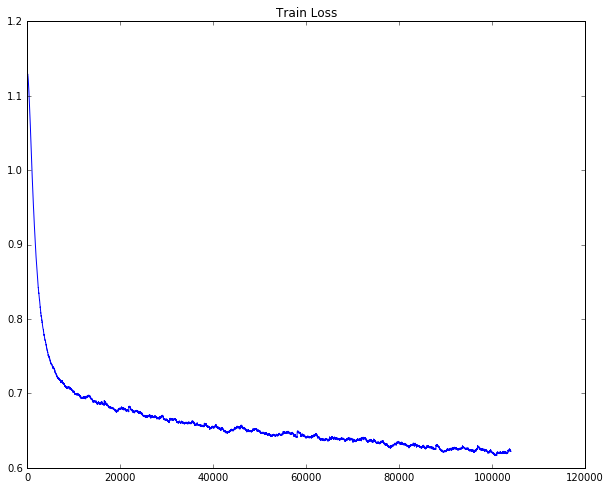

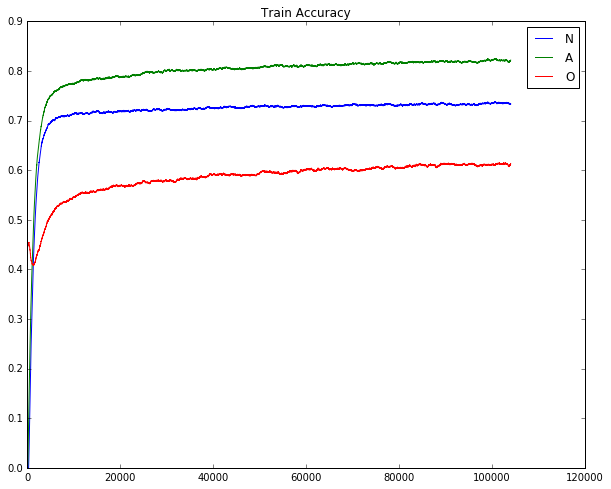

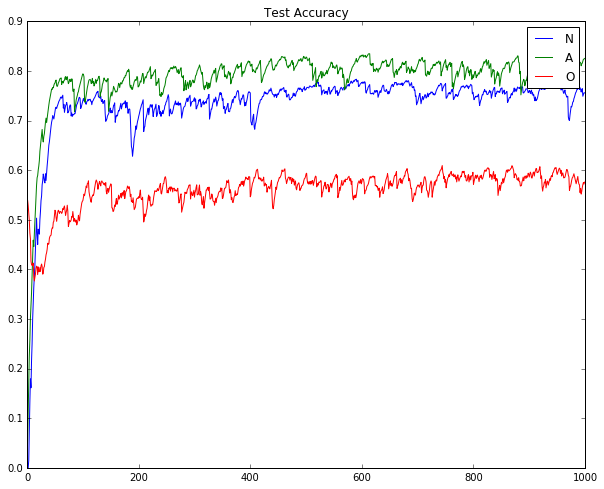

In [34]:
trainer.plot()

In [ ]:
plot_logit(low_cap_alt_DilNet)